In [89]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import h3
from tqdm import tqdm

print(os.getcwd())

import sys
from pathlib import Path

Path().resolve().parent

# Add utils to path
ROOT_PATH = Path().resolve().parent
print(f"{ROOT_PATH=}")
DATA_RAW_PATH = ROOT_PATH / "for_participants" / "data_parquet"
DATA_PROCESSED_PATH = ROOT_PATH / "for_participants" / "preprocessed_data"
DATA_DF_ALL_PATH = ROOT_PATH / "merged_dfs" / "df_all.parquet"
# assert DATA_PATH.exists()
sys.path.append(str(ROOT_PATH))
print(f"{DATA_RAW_PATH=}")
print(f"{DATA_PROCESSED_PATH=}")

# ASSIGNMENT_DIR = Path().resolve().parent
# HANDIN_DIR = ASSIGNMENT_DIR / 'handin'
OUTPUT_DIR = ROOT_PATH / 'output'

def read_data(file_name, path = DATA_RAW_PATH):
    df_tmp = pd.read_parquet(path / f'{file_name}.parquet')
    print(df_tmp.shape)
    return df_tmp


import warnings
warnings.filterwarnings('ignore')

/Users/tymoteuszbarcinski/DTU/WEC2025/wec2025/TB
ROOT_PATH=PosixPath('/Users/tymoteuszbarcinski/DTU/WEC2025/wec2025')
DATA_RAW_PATH=PosixPath('/Users/tymoteuszbarcinski/DTU/WEC2025/wec2025/for_participants/data_parquet')
DATA_PROCESSED_PATH=PosixPath('/Users/tymoteuszbarcinski/DTU/WEC2025/wec2025/for_participants/preprocessed_data')


In [90]:
df = pd.read_parquet(DATA_DF_ALL_PATH)
print(df.shape)

(95160, 460)


In [88]:
# df['weekend'] = df['weekedn']
# df['weekend_holiday'] = np.maximum(df['weekend'], df['is_holiday'])
# df['y'] = df['traffic']
# df['holiday'] = df['is_holiday']

# unique_station_id = df['station_id'].unique()
# # unique_station_id = np.array([2307, 2309])
# n_max = 30

# fig, ax = plt.subplots(n_max, 2, figsize=(10, n_max*4))
# for i, station_id in enumerate(unique_station_id[0:n_max]):
#     df_station = df.loc[lambda x: x['station_id'] == str(station_id)]
#     df0 = df_station.loc[lambda x: x['weekend_holiday'] == 0]
#     df1 = df_station.loc[lambda x: x['weekend_holiday'] == 1]
#     ax[i, 0].scatter(df0['hour'], df0['y'], s = 1, alpha=0.5, c = df0['dayofweek'])
#     ax[i, 1].scatter(df1['hour'], df1['y'], s = 1, alpha=0.5, c = df1['dayofweek'])
#     ax[i, 0].set_title(f"station_id: {station_id} weekend_holiday: 0")
#     ax[i, 1].set_title(f"station_id: {station_id} weekend_holiday: 1")
#     ax[i, 0].legend()

# plt.savefig(OUTPUT_DIR / 'station_week_holiday.png')

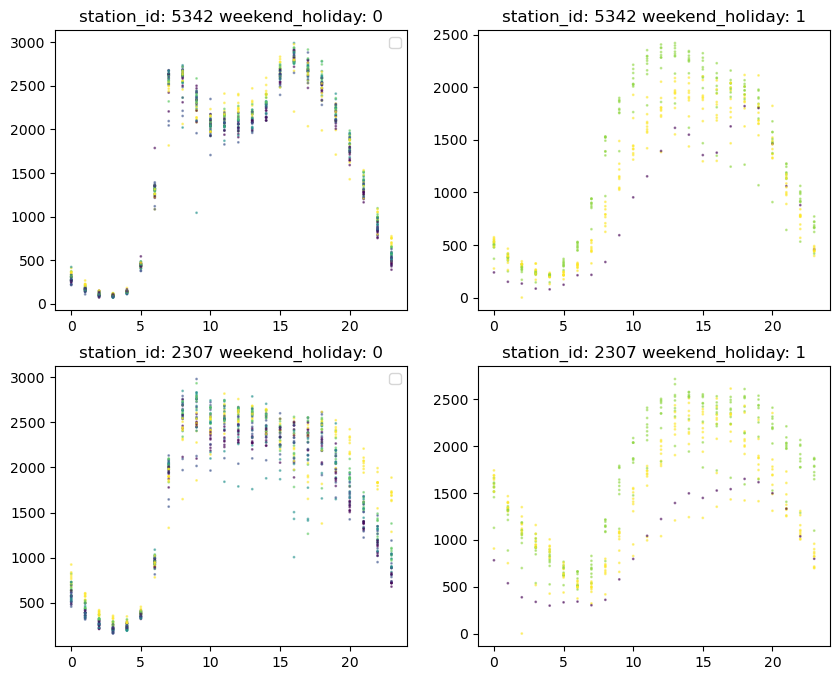

In [102]:
df['weekend'] = df['weekedn']
df['weekend_holiday'] = np.maximum(df['weekend'], df['is_holiday'])
df['y'] = df['traffic']
df['holiday'] = df['is_holiday']

# unique_station_id = df['station_id'].unique()
# station_highway = np.array([1318, 1366, 9398])
# stations_marszaflowska = np.array([2307, 2309])
stations_marszaflowska = np.array([5342, 2307])
unique_station_id = stations_marszaflowska.astype(str)
n_max = unique_station_id.shape[0]

fig, ax = plt.subplots(n_max, 2, figsize=(10, n_max*4))
for i, station_id in enumerate(unique_station_id[0:n_max]):
    df_station = df.loc[lambda x: x['station_id'] == station_id]
    df0 = df_station.loc[lambda x: x['weekend_holiday'] == 0]
    df1 = df_station.loc[lambda x: x['weekend_holiday'] == 1]
    ax[i, 0].scatter(df0['hour'], df0['y'], s = 1, alpha=0.5, c = df0['dayofweek'])
    ax[i, 1].scatter(df1['hour'], df1['y'], s = 1, alpha=0.5, c = df1['dayofweek'])
    ax[i, 0].set_title(f"station_id: {station_id} weekend_holiday: 0")
    ax[i, 1].set_title(f"station_id: {station_id} weekend_holiday: 1")
    ax[i, 0].legend()


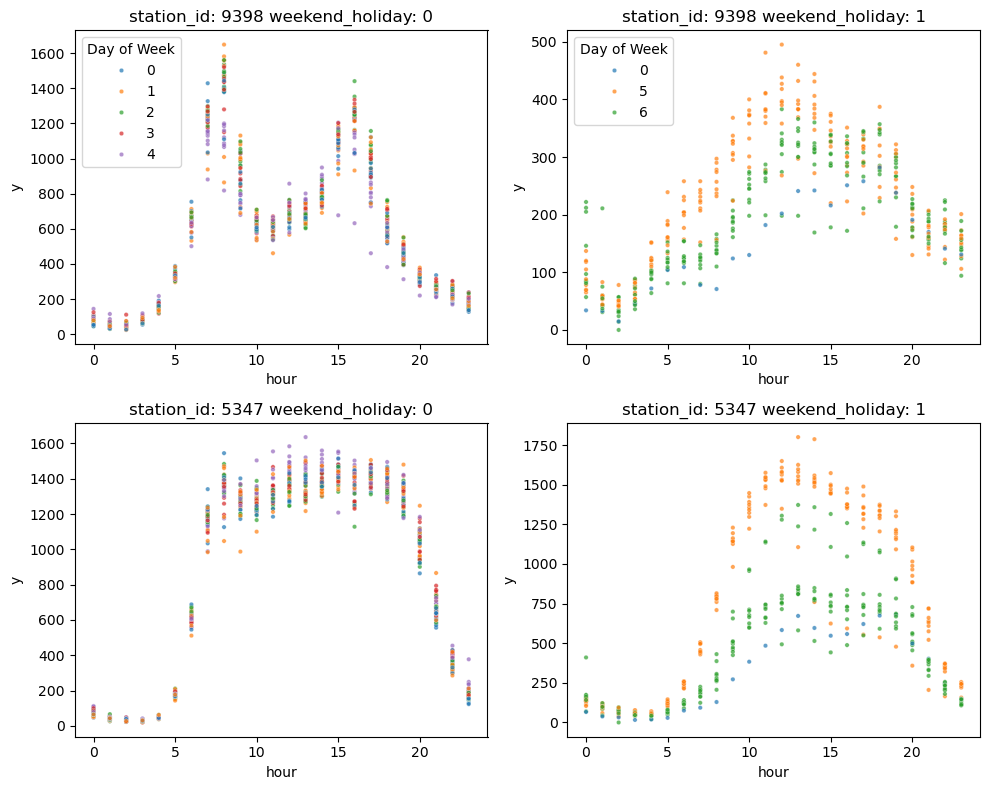

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

stations_plot = np.array([9398, 5347])
n_max = stations_plot.shape[0]

# Create subplots
fig, ax = plt.subplots(n_max, 2, figsize=(10, n_max * 4))

for i, station_id in enumerate(stations_plot):
    # Filter data for the current station_id
    df_station = df.loc[lambda x: x['station_id'] == str(station_id)]
    df0 = df_station.loc[lambda x: x['weekend_holiday'] == 0]
    df1 = df_station.loc[lambda x: x['weekend_holiday'] == 1]

    # Plot for weekend_holiday == 0
    sns.scatterplot(
        data=df0,
        x='hour',
        y='y',
        hue='dayofweek',  # Color points based on dayofweek
        palette='tab10',  # Use a distinct color palette
        s=10,  # Point size
        alpha=0.7,  # Transparency
        ax=ax[i, 0]  # Plot on the left subplot
    )

    # Plot for weekend_holiday == 1
    sns.scatterplot(
        data=df1,
        x='hour',
        y='y',
        hue='dayofweek',  # Color points based on dayofweek
        palette='tab10',  # Use the same color palette
        s=10,
        alpha=0.7,
        ax=ax[i, 1]  # Plot on the right subplot
    )

    # Set titles for subplots
    ax[i, 0].set_title(f"station_id: {station_id} weekend_holiday: 0")
    ax[i, 1].set_title(f"station_id: {station_id} weekend_holiday: 1")

    # Add legends only for the first row
    if i == 0:
        ax[i, 0].legend(title="Day of Week", bbox_to_anchor=(0, 1), loc='upper left')
        ax[i, 1].legend(title="Day of Week", bbox_to_anchor=(0, 1), loc='upper left')
    else:
        ax[i, 0].get_legend().remove()
        ax[i, 1].get_legend().remove()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

plt.savefig(OUTPUT_DIR / 'weekend_no_weekend.png')

In [314]:
df_subset = df.loc[lambda x: x['weekend_holiday'] == 0]
df_subset['station_id'] = df_subset['station_id'].astype(int)

# df_subset = df_subset.loc[lambda x: x['station_id'].isin(unique_station_id)]
# df_subset = df_subset.loc[lambda x: x['station_id'] == '5342']

hour_mean = np.arange(7,20)
# `df_subset.loc[lambda x: x['hour'].isin(hour_mean)].groupby('station_id')['traffic'].mean().reset_index()

# df_subset_grouped = df_subset.groupby(['station_id', 'hour'])['traffic'].mean().reset_index()

# df_pivot = df_subset_grouped.pivot(index='station_id', columns='hour', values='traffic')`

df_subset_hours = df_subset.loc[lambda x: x['hour'].isin([7, 8, 9])]

In [131]:
# df_subset.groupby(['hour'])[['signal_ctn_m_100_0', 'traffic']].agg(['sum', 'mean'])\
#         .plot.scatter(x = 'signal_ctn_m_100_0', y = 'traffic', s = 2)

In [315]:
# df_hour_mean = df_subset.loc[lambda x: x['hour'].isin(hour_mean)]\
#     .groupby(['station_id', 'date'])[['signal_ctn_m_50_0', 'traffic']]\
#     .agg({"signal_ctn_m_50_0": "sum", "traffic": "mean"})

# hour_to_group = hour_mean
# hour_to_group = [7, 8, 9]
hour_to_group = [17]
# x_column = "signal_ctd_m_75_0"
x_column = "signal_ctd_m_100_0"
# x_column = "signal_ctd_m_125_0"

df_hour_mean = df_subset.loc[lambda x: x['hour'].isin(hour_to_group)]\
    .groupby(['station_id', 'date'])[[x_column, 'traffic']]\
    .agg({x_column: "sum", "traffic": "mean"})

df_hour_mean = df_hour_mean.reset_index()
df_hour_mean['station_id'] = df_hour_mean['station_id'].astype(int)

<Axes: xlabel='signal_ctd_m_100_0', ylabel='traffic'>

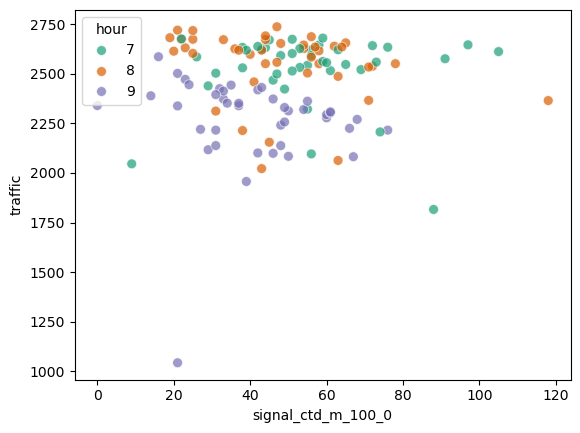

In [323]:
# plt.scatter(
#     df_hour_mean.loc[lambda x: x['station_id'] == 5342][x_column],
#     df_hour_mean.loc[lambda x: x['station_id'] == 5342]['traffic'],
# )

# plt.scatter(
#     df_subset.loc[lambda x: x['station_id'] == 5342][x_column],
#     df_subset.loc[lambda x: x['station_id'] == 5342]['traffic'],
#     c = df_subset.loc[lambda x: x['station_id'] == 5342]['hour'],
#     cmap='Dark2',
# )

df_filtered = df_subset.loc[lambda x: x['station_id'] == 5342]\
    .loc[lambda x: x['hour'].isin([7, 8, 9])]
sns.scatterplot(
    data=df_filtered,
    x=x_column,
    y='traffic',
    hue='hour',  # Use 'hour' for color
    palette='Dark2',  # Seaborn palette
    s=50,  # Size of the points
    alpha=0.7  # Transparency
)

In [313]:
 df_subset.loc[lambda x: x['station_id'] == 5342]

,station_id,date,street,segment,lat,lon,h3res13,hour,traffic,Residential_0_2,...,signal_ctd_rho_98,is_holiday,dayofweek,weekedn,date_hour,date_station,weekend,weekend_holiday,y,holiday


In [274]:
df_subset_station = df_subset.groupby(['station_id', 'hour'])[[x_column, 'traffic']]\
    .agg({x_column: "sum", "traffic": "mean"})
df_subset_station = df_subset_station.reset_index()
df_subset_station['station_id'] = df_subset_station['station_id'].astype(int)

In [297]:
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(
#     (df_subset_station[x_column]),
#     (df_subset_station['traffic']),
#     s=2,
#     c=df_subset_station['station_id'],  # Use station_id for color
#     cmap='Dark2',
# )

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(
#     (df_subset_station['hour']),
#     (df_subset_station[x_column]),
#     s=2,
#     c=df_subset_station['station_id'],  # Use station_id for color
#     cmap='Dark2',
# )

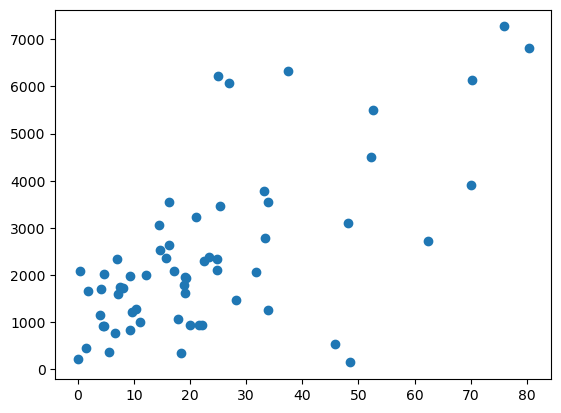

In [305]:
df_hour_mean_days = df_hour_mean.groupby(['station_id'])[[x_column, 'traffic']].mean()

fucntion_transform = lambda x: x
# fucntion_transform = lambda x: np.sqrt(x)

df_hour_mean_days_plot = df_hour_mean_days\
    .loc[lambda x: fucntion_transform(x[x_column]) < fucntion_transform(100)]
plt.scatter(
    fucntion_transform(df_hour_mean_days_plot[x_column]),
    fucntion_transform(df_hour_mean_days_plot['traffic'])
)

In [306]:
fucntion_transform(df_hour_mean_days_plot[[x_column, 'traffic']]).corr()

,signal_ctd_m_100_0,traffic
signal_ctd_m_100_0,1.000000,0.655548
traffic,0.655548,1.000000
